In [79]:
#import all packages
import h5py
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import tf_utils
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt


In [101]:
#Reding neuron data (weight-bias)
valores_W1 = np.loadtxt('C:\\Users\\aleja\\Desktop\\DeepLearning\\Parameters\\SignDetection\\parameters_W1.dat', delimiter=',', dtype='float32')
valores_b1 = np.loadtxt('C:\\Users\\aleja\\Desktop\\DeepLearning\\Parameters\\SignDetection\\parameters_b1.dat', delimiter=',', dtype='float32')
valores_W2 = np.loadtxt('C:\\Users\\aleja\\Desktop\\DeepLearning\\Parameters\\SignDetection\\parameters_W2.dat', delimiter=',', dtype='float32')
valores_b2 = np.loadtxt('C:\\Users\\aleja\\Desktop\\DeepLearning\\Parameters\\SignDetection\\parameters_b2.dat', delimiter=',', dtype='float32')
valores_W3 = np.loadtxt('C:\\Users\\aleja\\Desktop\\DeepLearning\\Parameters\\SignDetection\\parameters_W3.dat', delimiter=',', dtype='float32')
valores_b3 = np.loadtxt('C:\\Users\\aleja\\Desktop\\DeepLearning\\Parameters\\SignDetection\\parameters_b3.dat', delimiter=',', dtype='float32')

neuronas = {
    "W1" : valores_W1,
    "b1" : np.array([valores_b1]).T,
    "W2" : valores_W2,
    "b2" : np.array([valores_b2]).T,
    "W3" : valores_W3,
    "b3" : np.array([valores_b3]).T
}


In [99]:
def ParameterImportationWeights(NumberofParameters,Path,NameOfWeights,NameOfBiases):
    for i in range(1,NumberofParameters):
        Neurones={
            "W" + str(i) :np.loadtxt(Path+NameOfWeights+str(i)+'.dat', delimiter=',', dtype='float32'),
            "b" + str(i) :np.array([np.loadtxt(Path+NameOfBiases+str(i)+'.dat', delimiter=',', dtype='float32')]).T
        }
        return Neurones

In [100]:
ParameterImportationWeights(4,'C:\\Users\\aleja\\Desktop\\DeepLearning\\Parameters\\SignDetection\\','parameters_W','parameters_b')

{'W1': array([[-0.02022286, -0.02184957, -0.01954888, ...,  0.01733965,
         0.00708922,  0.01705988],
       [ 0.0179748 ,  0.02152602,  0.00493785, ..., -0.10161665,
         0.00539711,  0.10802788],
       [ 0.00603335, -0.0141639 ,  0.00799852, ..., -0.01602918,
        -0.01637063, -0.02169758],
       ...,
       [ 0.00657687,  0.01621635, -0.0187264 , ...,  0.00042768,
         0.01020896,  0.00671687],
       [-0.01919611, -0.00251234,  0.00372404, ..., -0.00157393,
        -0.00190098, -0.00875724],
       [-0.00408912,  0.00259801,  0.02102262, ..., -0.00317568,
        -0.00170461,  0.00117499]], dtype=float32), 'b1': array([[-0.00060047],
       [ 0.03452941],
       [-0.0004682 ],
       [-0.00071748],
       [-0.00060052],
       [-0.00043804],
       [ 0.        ],
       [-0.00055584],
       [-0.00076829],
       [ 0.        ],
       [-0.01626391],
       [-0.00060025],
       [-0.00060054],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
      

C:\Users\aleja\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  del sys.path[0]
C:\Users\aleja\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


Your algorithm predicts: y = 5


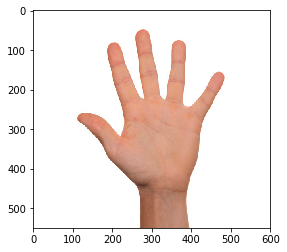

In [68]:

#neuronas=model(X_train,Y_train,X_test,Y_test)
import scipy
from PIL import Image
from scipy import ndimage

## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "img5.jpg"
## END CODE HERE ##

# We preprocess your image to fit your algorithm.
fname = "Images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T
my_image_prediction = predict(my_image, neuronas)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))

# Transfer Learning
-**IMPORTANT**   
As we have already Trained the dataset we can transfer the values of the parameters without needing to train a dataset every time we need to use our algorithm:

```python
def ParameterExportation(NumberOfWeights , NumberofBiases , PathWeights , PathBiases , WeightName , BiasesName ):
        for i in range( 1 , NumberOfWeights ):
            np.savetxt( PathWeights + WeightName + str(i) + '.dat' , parameters["W"+str(i)] , delimiter=',')
        for i in range( 1 , NumberofBiases ):
            np.savetxt( PathBiases + BiasesName + str(i) +'.dat', parameters["b"+str(i)] , delimiter=',')
        print(" Weights and Biases have been exported correctly !!")
```

In [102]:
# NumberOfWeights:4
# NUmberofBiases:4
# WeightPath:'C:\\Users\\aleja\\Desktop\\DeepLearning\\Parameters\\SignDetection\\Pruebas\\
# BiasesPath:'C:\\Users\\aleja\\Desktop\\DeepLearning\\Parameters\\SignDetection\\Pruebas\\
# NameofWeights :parameters_w
# NameofBiases :parameters_b
def ParameterExportation(NumberOfWeights , NumberofBiases , PathWeights , PathBiases , WeightName , BiasesName ):
        for i in range( 1 , NumberOfWeights ):
            np.savetxt( PathWeights + WeightName + str(i) + '.dat' , parameters["W"+str(i)] , delimiter=',')
        for i in range( 1 , NumberofBiases ):
            np.savetxt( PathBiases + BiasesName + str(i) +'.dat', parameters["b"+str(i)] , delimiter=',')
        print(" Weights and Biases have been exported correctly !!")

In [103]:
ParameterExportation(4 , 4 , 'C:\\Users\\aleja\\Desktop\\DeepLearning\\Parameters\\SignDetection\\Pruebas\\' , 'C:\\Users\\aleja\\Desktop\\DeepLearning\\Parameters\\SignDetection\\Pruebas\\' , 'parameters_W' , 'parameters_b' )

NameError: name 'parameters' is not defined